# 6103 Tean project

## Drouvas Panagiotis, Dimos Giorgos, Kontoudakis Nikos, Vergas Panagiotis

In [1]:
#library import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import f1_score, accuracy_score, precision_recall_fscore_support

### Part 1.

In [2]:
# libraries specifically for part 1
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

#future selection
from sklearn.feature_selection import mutual_info_classif

#k-means
from sklearn.cluster import KMeans

In [3]:
# based on kddcup.names from kaggle
collumnNames =  [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", 
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
    "dst_host_srv_rerror_rate", "label"
]

allData =pd.read_csv('kddcup.data_10_percent', header=None, names = collumnNames)
allData = allData.sample(frac = 0.15)
# last one is the label 
y_labels = allData.iloc[:, -1]
set(y_labels)

{'back.',
 'buffer_overflow.',
 'guess_passwd.',
 'imap.',
 'ipsweep.',
 'land.',
 'multihop.',
 'neptune.',
 'nmap.',
 'normal.',
 'perl.',
 'phf.',
 'pod.',
 'portsweep.',
 'rootkit.',
 'satan.',
 'smurf.',
 'teardrop.',
 'warezclient.',
 'warezmaster.'}

In [4]:
# one hot encoding
data = pd.get_dummies(allData.iloc[:, 0:41], columns=["protocol_type", "service", "flag"])

# normalize
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# reduce dimensions
pca = PCA(n_components=14)
data = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, y_labels, test_size=0.3, random_state=13)

In [5]:
information=mutual_info_classif(X_train,y_train)
print('Information=',information)

Information= [1.03227644 1.02026237 0.97738221 0.99468766 0.91082814 0.90661287
 0.91663047 0.9454108  0.89079935 0.87471834 0.80896575 0.80739351
 0.83714656 0.828732  ]


## DBSCAN

### loop to find best hyper paramters (I bear no responsibility for burned CPUs)

In [6]:
# evaluationMetricsDBSCAN = []
# # data = X_train.copy()
# print(len(data))
# for i in np.arange(4, 10, 2):
#     for x in [ 0.2, 0.5, 1, 2]:  
#         db = DBSCAN(eps=x, min_samples=i).fit(data)
#         core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#         core_samples_mask[db.core_sample_indices_] = True
#         labels = db.labels_
#         n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#         if(len(set(labels))> 1 and n_clusters_ > 1):
#             silhouette_values = silhouette_samples(data, labels)
          
#             # print ('silhouette=', np.mean(silhouette_values))
#             # print('Estimated number of clusters: %d' % n_clusters_)
#             # print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data, labels))

#             evaluationMetricsDBSCAN.append({'min_samples': i, 'eps': x, 'silhouette': round(np.mean(silhouette_values), 3), 'expected number of clusters': n_clusters_})
#         # else:
#             # print("no results for:", len(set(labels)),  n_clusters_)

74103


In [7]:
# metricsDF = pd.DataFrame(evaluationMetricsDBSCAN)
# sortedMetrics= metricsDF.sort_values(by=['silhouette'], ascending= False)
# print(sortedMetrics[:4])
# sortedMetrics= sortedMetrics.sort_values(by=['expected number of clusters'], ascending= True)
# print(sortedMetrics[:4])

   min_samples  eps  silhouette  expected number of clusters
4            6  0.5       0.870                           42
7            8  0.5       0.870                           39
1            4  0.5       0.868                           46
3            6  0.2       0.825                           79
   min_samples  eps  silhouette  expected number of clusters
2            4  1.0       0.549                            4
5            6  1.0       0.547                            5
8            8  1.0       0.547                            5
7            8  0.5       0.870                           39


In [8]:
# once more with the best parameters (we choose something with few clusters)
db = DBSCAN(eps=1, min_samples=6).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

### Ploting

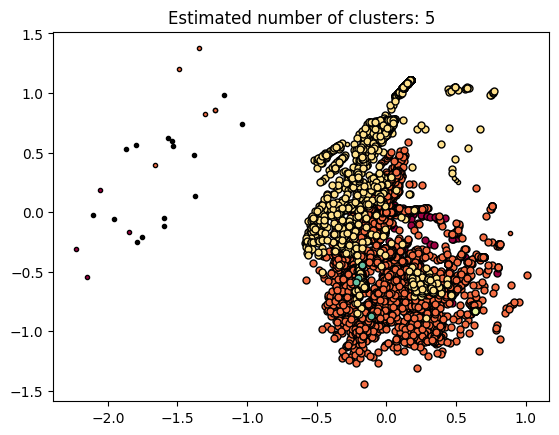

In [9]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.figure('dbscan')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # core nodes
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 12], xy[:, 4], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    # border nodes
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
# black is noise.

### dimension reduction (better ploting)

In [10]:
# Compute silhouette score
if len(set(labels)) > 1:
    silhouette_values = silhouette_samples(data, labels)
    print('Silhouette: ', round(np.mean(silhouette_values), 3))
else:
    print("Silhouette score not applicable (only one cluster detected)")

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
            
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters_}")

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

Silhouette:  0.547
Number of clusters: 5


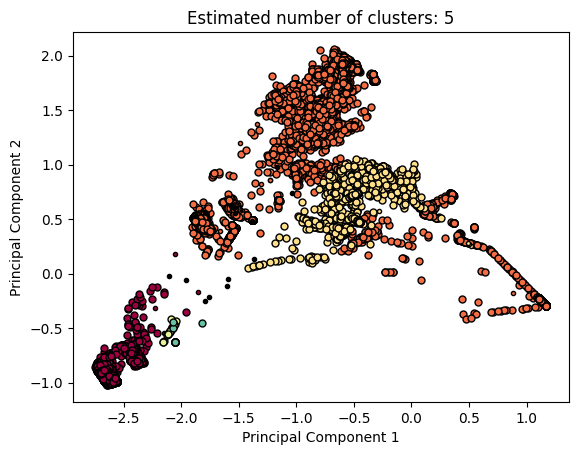

In [11]:
plt.figure('pca-dbscan')
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)

    # Core points
    xy = data_2d[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    # Border points
    xy = data_2d[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [12]:
# Get indices of noise points and print their features
noise_indices = np.where(db.labels_ == -1)[0]   
noise_points = data[noise_indices]
print(noise_points)

[[-1.59794338 -0.11655572 -0.59224502 -0.13618133 -0.69621819 -1.32895672
  -0.36080369  0.02878747 -0.12421932 -0.28175634 -0.6290501   0.04725881
   0.01935765  0.11679101]
 [-1.38171416  0.48385642 -0.28011427  0.06782646 -0.39186601 -0.1720281
  -0.56285618 -0.5823276   0.05637375  0.1404813  -0.87647619 -0.17999382
   0.11849271 -0.17264595]
 [-1.03756737  0.73742448 -0.57931859 -0.5079184  -0.12132814 -1.42774868
  -0.18531995 -0.21204159  0.447336   -0.33487141 -0.13373813  0.29176043
   0.04758643  0.09624987]
 [-2.10581459 -0.02427995 -0.46958089  0.08312685 -0.84814466 -0.91060027
  -0.5417937  -0.5623165   0.06351139 -0.38198171  0.16658985  0.0376046
  -0.29237147 -0.63649865]
 [-1.16902975  0.98099283  0.91472175  0.13391276 -0.54748291 -0.00677341
  -0.50004619 -0.53977808 -0.02793577  0.00628568 -0.86817656 -0.25333359
  -0.08030205 -0.11767106]
 [-1.79400214  0.56375251 -0.25550531  0.01292692 -0.71092871 -0.05629704
   0.1127634  -0.14058887 -0.16852313 -0.09100535 -0.

# K-Means

In [13]:
allEvaluationMetrics = []
# we need low intertia and high silhouette
for i in  np.arange(2, 10, 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    y_kmeans = kmeans.predict(X_train)
    silhouette_values = silhouette_samples(X_train, y_kmeans)
    allEvaluationMetrics.append({'i': i, 'inertia': kmeans.inertia_, 'silhouette': np.mean(silhouette_values)})

allEvaluationMetrics

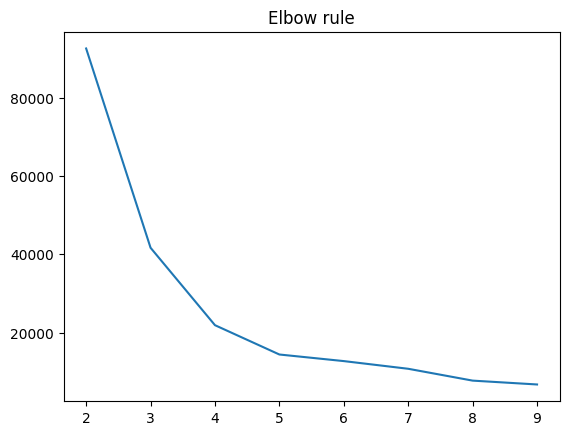

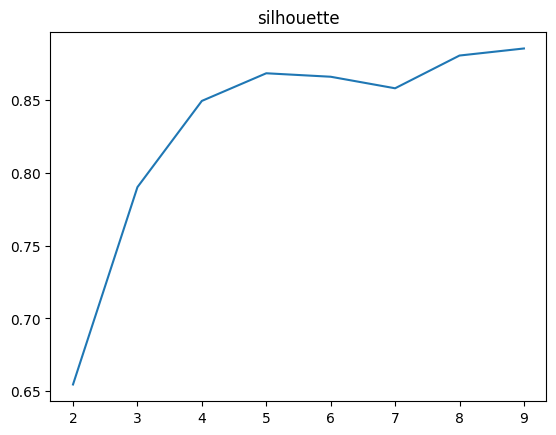

In [15]:
plt.figure('elbow km')
plt.title('Elbow rule')
plt.plot([d['i'] for d in allEvaluationMetrics], [x['inertia'] for x in allEvaluationMetrics])
plt.show()

plt.figure('silhouette km')
plt.title('silhouette')
plt.plot([d['i'] for d in allEvaluationMetrics], [x['silhouette'] for x in allEvaluationMetrics])
plt.show()

In [16]:
# we used the silhouette metric to pick a number of clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)
silhouette_values = silhouette_samples(X_test, y_kmeans)

In [17]:
# Reduce dimensions to two for better ploting
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_test)

<Figure size 640x480 with 0 Axes>

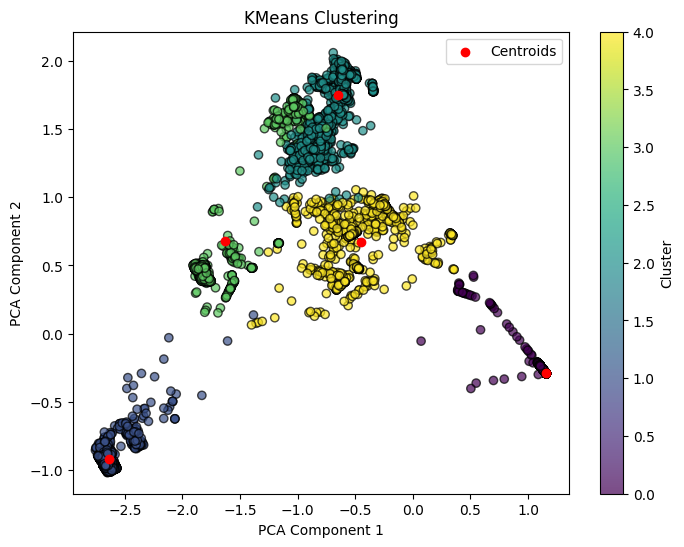

In [19]:
plt.figure('kmeans)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='o', label='Centroids')  # Plot centroids
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clustering")
plt.legend()
plt.show()

In [21]:
## an effort to plot the roc (probabky bot worth it)
# confMatrixTestDB=confusion_matrix(np.where(y_labels == 'normal.', 0, 1), db.labels_, labels=None)
# confMatrixTestKM=confusion_matrix(np.where(y_test == 'normal.', 0, 1), y_kmeans, labels=None)

# print ('Conf matrix DBSCAN')
# print (confMatrixTestDB)
# print ()

# print ('Conf matrix KMeans')
# print (confMatrixTestKM)
# print ()

# # Measures of performance: Precision, Recall, F1


# print(y_labels)
# print(db.labels_)
# print ('DBSCAN: Macro Precision, recall, f1-score')
# print ( precision_recall_fscore_support(np.where(y_labels == 'normal.', 0, 1), db.labels_, average='macro'))
# print ('DBSCAN Micro Precision, recall, f1-score')
# print (precision_recall_fscore_support(np.where(y_labels == 'normal.', 0, 1), db.labels_, average='micro'))
# print ('\n')

# print ('KMeans: Macro Precision, recall, f1-score')
# print ( precision_recall_fscore_support(np.where(y_test == 'normal.', 0, 1), y_kmeans, average='macro'))
# print ('KMeans: Micro Precision, recall, f1-score')
# print (precision_recall_fscore_support(np.where(y_test == 'normal.', 0, 1), y_kmeans, average='micro'))
# print ('\n')

# print ('Support Vector: Macro Precision, recall, f1-score')
# #print ( precision_recall_fscore_support(y_test, y_test_pred_SVM, average='macro'))
# print ('NearNeigh: Micro Precision, recall, f1-score')
# #print (precision_recall_fscore_support(y_test, y_test_pred_SVM, average='micro'))
# print ('\n')




# fpr_kmeans, tpr_kmeans, _ = roc_curve(np.where(y_test == 'normal.', 0, 1), y_kmeans)
# fpr_dbscan, tpr_dbscan, _ = roc_curve(np.where(y_labels == 'normal.', 0, 1), db.labels_)

# # Compute AUC scores
# auc_kmeans = auc(fpr_kmeans, tpr_kmeans)
# auc_dbscan = auc(fpr_dbscan, tpr_dbscan)

# # Plot ROC Curves
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_kmeans, tpr_kmeans, label=f'K-Means (AUC = {auc_kmeans:.2f})', color='blue')
# plt.plot(fpr_dbscan, tpr_dbscan, label=f'DBSCAN (AUC = {auc_dbscan:.2f})', color='red')

# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for K-Means vs DBSCAN')
# plt.legend()
# plt.show()

In [ ]:
# evaluate and characterize them

In [ ]:
# Detect possible abnormal behavior